In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
data=pd.read_csv("E:\python\simple data.csv")

In [100]:
data.head()

,Machine,Age,Week_Number
0,1,70,5
1,0,59,4
2,1,68,4
3,0,50,6
4,0,40,7


In [101]:
train_data=data.values

In [102]:
train_data=train_data[:,1 :]

In [103]:
train_data

array([[70,  5],
       [59,  4],
       [68,  4],
       [50,  6],
       [40,  7],
       [78,  8],
       [57,  7],
       [73,  6],
       [71,  7],
       [38,  4]], dtype=int64)

In [104]:
label_data=data["Machine"]

In [105]:
X_train,X_test,Y_train,Y_test=train_test_split(train_data,label_data)

In [106]:
model= LogisticRegression(C=3e5)
model.fit(X_train,Y_train)

LogisticRegression(C=300000.0)

In [107]:
pred=model.predict(X_test)

In [110]:
cf_matrix=confusion_matrix(Y_test,pred)

In [111]:
cf_matrix

array([[0, 1],
       [1, 1]], dtype=int64)

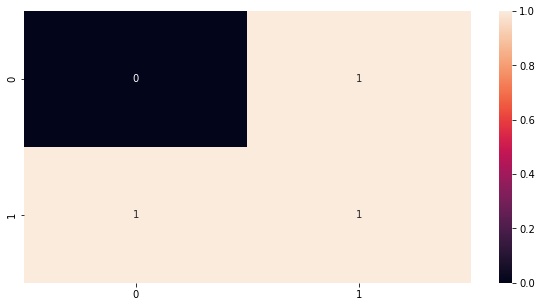

In [124]:
plt.figure(figsize=(10,5))
sns.heatmap(cf_matrix,annot=True)
plt.show()

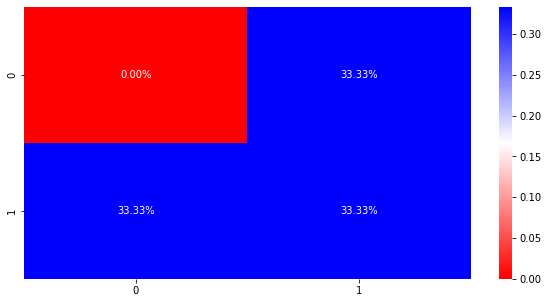

In [123]:
plt.figure(figsize=(10,5))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='bwr_r')
plt.show()

## Making a heatmap with labels

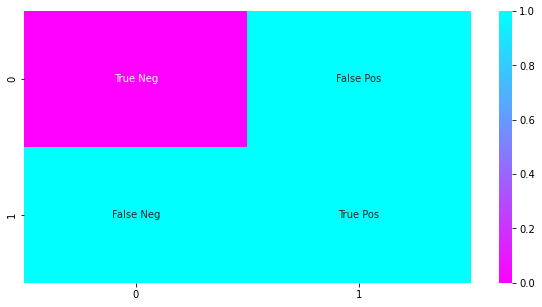

In [128]:
plt.figure(figsize=(10,5))
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='cool_r')
plt.show()

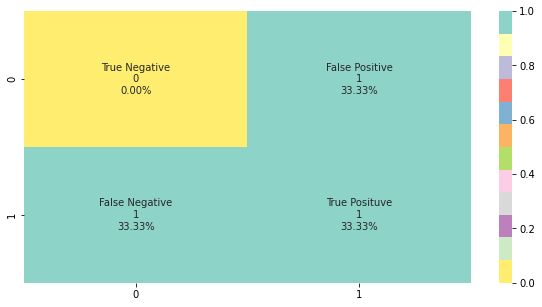

In [139]:
plt.figure(figsize=(10,5))
group_names = ['True Negative',"False Positive","False Negative","True Posituve"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Set3_r')
plt.show()

# Arguments
---------
* cf:            confusion matrix to be passed in

* group_names:   List of strings that represent the labels row by row
               to be shown in each square.

* categories:    List of strings containing the categories to be
               displayed on the x,y axis. Default is 'auto'

* count:         If True, show the raw number in the confusion matrix.
               Default is True.

* normalize:     If True, show the proportions for each category.
               Default is True.

* cbar:          If True, show the color bar. The cbar values are
               based off the values in the confusion matrix.
               Default is True.

* xyticks:       If True, show x and y ticks. Default is True.

* xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on
               the figure. Default is True.

* sum_stats:     If True, display summary statistics below the figure.
               Default is True.

* figsize:       Tuple representing the figure size. Default will be
               the matplotlib rcParams value.

* cmap:          Colormap of the values displayed from
               matplotlib.pyplot.cm. Default is 'Blues'